In [93]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

path = '/home/jose7198/Documents/Datasets/crime-data-from-2010-to-present.csv'
df = pd.read_csv(path)

# Informe de crímenes cometidos en Los Ángeles

### Basado en los datos obtenidos en https://www.kaggle.com/cityofLA/los-angeles-crime-arrest-data#crime-data-from-2010-to-present.csv

## Evolución del número de crímenes en la última decada
Para empezar este informe, sería una buena idea visualizar como ha evolucionado el número total de crímenes registrados durante la última decada en la ciudad de Los Ángeles. Esto sería útil para tener una vista general de contexto para los siguientes gráficos.

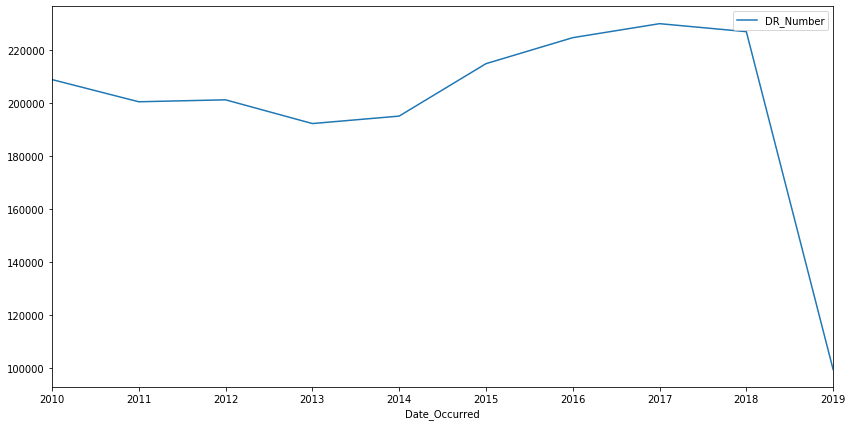

In [152]:
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], format="%Y-%m-%d")

df.Date_Occurred.dt.year

df1 = df.groupby(df.Date_Occurred.dt.year)['DR_Number'].count()

df1.reset_index().plot(kind='line', x='Date_Occurred', y='DR_Number', figsize=(14, 7))

## Número de crímenes en el presente año
La gráfica anterior refleja claramente el hecho de que, del presente año, solo existen datos hasta cierta fecha (Junio en este caso) por lo que para centrarnos de mejor manera en el año que se va a estudiar en este informe, revisaremos la evolución del número de crímenes en el 2019 

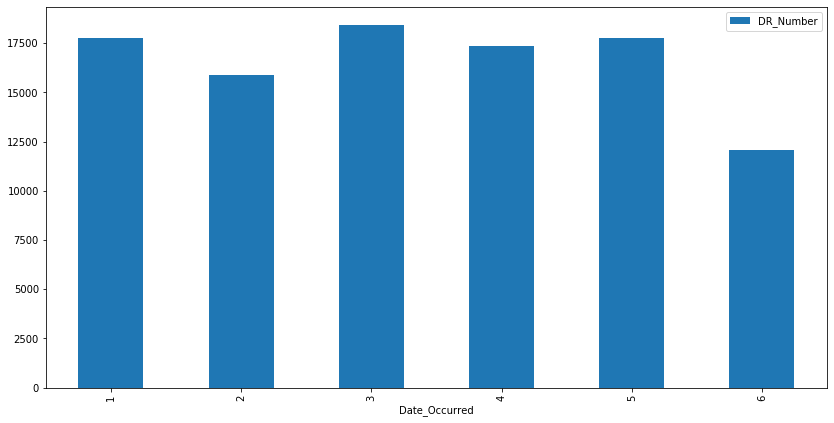

In [153]:
df2019 = df[df.Date_Occurred.dt.year >= 2019]

df2 = df2019.groupby(df.Date_Occurred.dt.month)['DR_Number'].count()

df2.reset_index().plot(kind='bar', x='Date_Occurred', y='DR_Number', figsize=(14, 7))

## La hora del crímen
Tal parece que en Los Ángeles, la hora favorita de los criminales para actuar son las 11 AM y las 08 PM

/home/jose7198/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


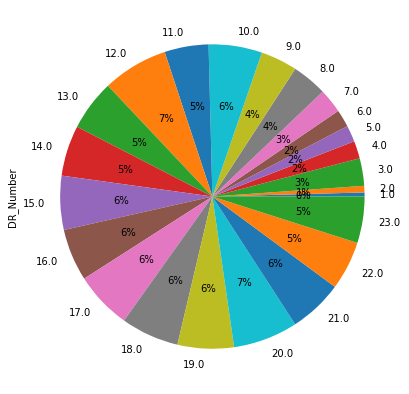

In [154]:
df2019['Time_Occurred'] = pd.to_datetime(df2019.Time_Occurred, format="%H%M", errors="coerce")

df3 = df2019.groupby(df2019.Time_Occurred.dt.hour)['DR_Number'].count()

df3.plot.pie(y='DR_Number', figsize=(7, 7), autopct='%1.0f%%')


## El área más peligrosa de los Ángeles
Este gráfico te será de utilidad si piensas visitar Los Ángeles, ni se te ocurra visitar el área de 77th Street

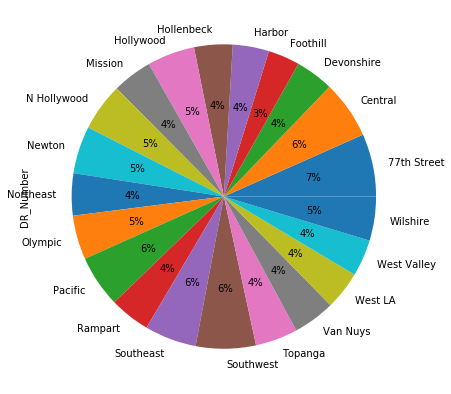

In [158]:
df4 = df2019.groupby(df2019.Area_Name)['DR_Number'].count()

df4.plot.pie(y='DR_Number', figsize=(7, 7), autopct='%1.0f%%')

## El crímen mas frecuente en Los Ángeles
Es una buena idea saber a que te enfrentas en los Ángeles, para estar más seguro cuida

In [ ]:
df4 = df2019.groupby(df2019.Area_Name)['DR_Number'].count()

df4.plot.pie(y='DR_Number', figsize=(7, 7), autopct='%1.0f%%')